## Observations and Insights
*As a general comment off this homework, moreso than other assignments, I felt repeatedly tested, failed, then tested more and finally succeeded. Several attempts have been left in "commented out" cells showing places where I tried certain methods (or got help with methods) that didn't work. Additionally, as a professional videographer whose job relies on aesthetics and "pretty" pictures, I liked this section because of the results that showed me something visual.

1. Using the bar charts, the drug regimens Capomulin and Ramicane had the highest number of timepoints. Both were over 4800 timepoints. The drug regimen with the next closest tally of timepoints was over 1000 timepoints behind. One conclusion to draw is very simply that Capomulin and Ramicane have more conclusive results. While more timepoints may broaden the overall scope of research, it may also yield a more true average.

2. On the line chart, I tried a couple different drug regimens just to see what I would get (and also to prove I didn't just pick the first mouse and first drug regimen that showed up in my dataframe). I picked a mouse that used Propriva, the drug regimen that had the least number of  timepoints. Propriva only had 2715 timepoints, which is just about half of that of the drug regimen with the highest number of timepoints. I don't know why it had the fewest number of timepoints, but my initial thought was because Propriva actually enlarged the tumor. If a drug makes a tumor grow, my thought was that it should stop being used. As I went along, however, I started thinking that shouldn't always assume that because a drug is used, it's going to yield what I EXPECT. My expectation, without really thinking about it beforehand, was that all drugs would reduce the size of the tumor. In the case of Propriva, the tumor actually grew over time. To that end, I shouldn't assume that the intent of Propriva was used to shrink a tumor. Rather, I could assume that there was just going to be an effect of some kind - possible tumor growth - that needed to be measured.

3. I'm not sure if falls under "observation" or "should be obvious," but the number of males versus females was almost equal. The only reason I would think it's an observation is because the numbers clearly are not equal. If you wanted to have a true comparison, it seems like you would want to have an even number of both male and female subjects. 

 LaTeX:  𝛼2

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
merge_mouse_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary statistics

In [3]:
#drs = list(merge_mouse_data['Drug Regimen'].unique())
#drs

In [4]:
#min(merge_mouse_data[merge_mouse_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"])

In [5]:
#result = {}
#for dr in drs:
    #sem = st.sem(merge_mouse_data[merge_mouse_data["Drug Regimen"] == dr]["Tumor Volume (mm3)"])
    #std = np.std(merge_mouse_data[merge_mouse_data["Drug Regimen"] == dr]["Tumor Volume (mm3)"])
    #result[dr] = {'sem':sem, 'std':std}             

In [6]:
#pd.DataFrame(result).T

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug_regimen = merge_mouse_data.groupby(['Drug Regimen'])
grouped_drug_regimen

In [8]:
# Calculate MEAN Tumor Volume for each Drug Regimen
mean_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].mean()


In [9]:
# Calculate MEDIAN Tumor Volume for each Drug Regimen
median_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].median()


In [10]:
# Calculate VARIANCE Tumor Volume for each Drug Regimen
variance_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].var()


In [11]:
# Calculate STANDARD DEVIATION of Tumor Volume for each Drug Regimen
stan_dev_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].std()


In [12]:
# Calculate SEM Tumor Volume for each Drug Regimen
SEM_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].sem()


In [13]:
# Print Summary Table of all calculations
# Found in 4-Pandas/2/6
drug_regimen_summary_table = pd.DataFrame({"Mean": mean_tumor_volume,
                                           "Median": median_tumor_volume,
                                           "Variance": variance_tumor_volume,
                                           "Standard Deviation": stan_dev_tumor_volume,
                                           "Standard Error of the Mean": SEM_tumor_volume})
drug_regimen_summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

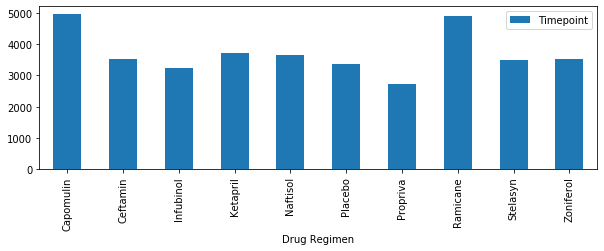

In [75]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Found in 5-Matplotlib/2/2

# Using the number of 'Timepoint' entries for each Drug Regimen, then do a bar plot
data_points = grouped_drug_regimen['Timepoint'].sum()

# Convert the data_points Series into a DataFrame
drug_regimen_data_points = pd.DataFrame(data_points)
drug_regimen_data_points

# Use new dataframe with just the drug regimen and the sum of timepoints to create the bar chart
drug_regimen_data_points.plot(kind="bar", figsize=(10,3))

In [15]:
drug_regimen_data_points

,Timepoint
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650
Placebo,3380
Propriva,2715
Ramicane,4885
Stelasyn,3480


In [16]:
#drug_regimen_data_points=drug_regimen_data_points.reset_index()
#drug_regimen_data_points = drug_regimen_data_points.rename(columns={"index": "new index"})

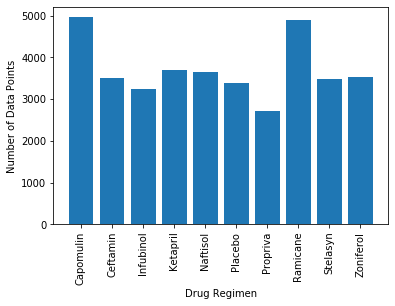

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(data_points))
tick_locations = [value for value in x_axis]

#counts = data_points['Drug Regimen'].value_counts()
plt.bar(data_points.index.values,data_points.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

#plt.figure(figsize=(10,3))
#plt.bar(x_axis, data_points["Drug Regimen"], color='r', alpha=0.5, align="center")
#plt.xticks(rotation = 90)
#plt.show()

## Pie plots

In [21]:
# Create a variable identifying the number of mice using their "Mouse ID"

# Create a dataframe with just male mice
#male_mice = mice_id_sex.loc[mice_id_sex["Sex"] == "Male"]

In [22]:
# Create a dataframe with just female mice
#female_mice = mice_id_sex.loc[mice_id_sex["Sex"] == "Female"]

In [23]:
# Get a value count on male and female mice using the Sex column
male_female_counts = mouse_metadata["Sex"].value_counts()
male_female_counts

Male      125
Female    124
Name: Sex, dtype: int64

In [24]:
# Create a dataframe from the previous value count result
male_female_mice_count = pd.DataFrame(male_female_counts)
male_female_mice_count

,Sex
Male,125
Female,124


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000254900C8E48>],
      dtype=object)

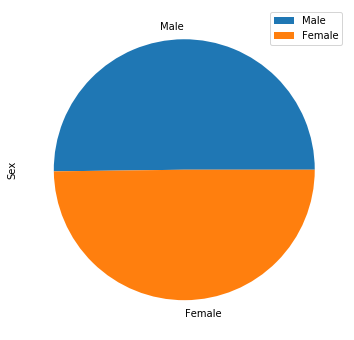

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_mice_count.plot.pie(figsize=(6, 6), subplots=True)


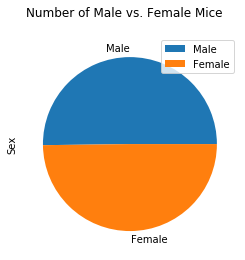

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_female_mice_pie = male_female_mice_count.plot(kind="pie", title=("Number of Male vs. Female Mice"), subplots=True)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a dataframe showing only mice treated with Capomulin
propriva_mice = merge_mouse_data.loc[merge_mouse_data["Drug Regimen"] == "Propriva", :]
propriva_mice

# Create a dataframe singling out one mouse treated with Capomulin
one_propriva_mouse = propriva_mice.loc[propriva_mice["Mouse ID"] == "a699", :]
one_propriva_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
542,a699,Propriva,Female,5,28,5,46.553090,0
543,a699,Propriva,Female,5,28,10,47.867376,0
544,a699,Propriva,Female,5,28,15,49.530401,0
545,a699,Propriva,Female,5,28,20,50.712423,0
546,a699,Propriva,Female,5,28,25,51.846381,0
547,a699,Propriva,Female,5,28,30,54.379345,0
548,a699,Propriva,Female,5,28,35,56.510682,1
549,a699,Propriva,Female,5,28,40,58.605448,1
550,a699,Propriva,Female,5,28,45,62.191414,1


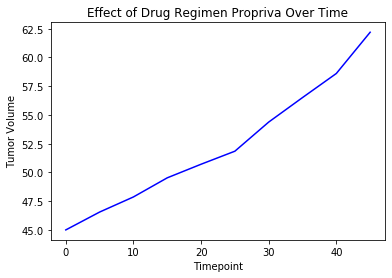

In [78]:
timepoint_vs_tumorvolume = plt.plot(one_propriva_mouse["Timepoint"], one_propriva_mouse["Tumor Volume (mm3)"], color="blue")

plt.title('Effect of Drug Regimen Propriva Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

timepoint_vs_tumorvolume

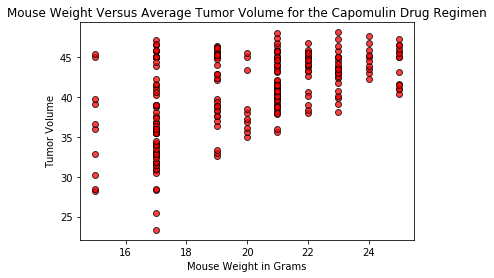

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a dataframe displaying only the columns I'll use to calculate
mouseweight_vs_tumorvolume = capomulin_mice[["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]

weight_vs_tumorvolume = plt.scatter(mouseweight_vs_tumorvolume["Weight (g)"], mouseweight_vs_tumorvolume["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Mouse Weight Versus Average Tumor Volume for the Capomulin Drug Regimen')
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Tumor Volume')

weight_vs_tumorvolume

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen